# Calculating the $\beta$ of a security using linear regression

In this code, we calculate the $\beta$ of a security. The price data is downloaded from Yahoo finance and the monthly returns are calculated. We choose the Microsoft stock and calculate its correlation with the S&P 500. 

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). 

The formula is: $\beta = \frac{cov(r_s r_b)}{var(r_b)}$

$r_s$: return of the stock

$r_b$: return of the benchmark

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import statsmodels.api as sm

美股直接输入股票代码如GOOG   
港股输入代码+对应股市，如腾讯：0700.hk   
国内股票需要区分上证和深证，股票代码后面加.ss或者.sz  
请输入你要查询的股票代码：  

In [2]:
price_data = pd.DataFrame()
stock_code=input("请输入股票代码：")
index_code=input("请输入指数代码：")
start_date=input("请输入开始日期：")
end_date=input("请输入结束日期：")
interval=input("请输入间隔eg-d,m,y:")
asset_list = [stock_code,index_code]

for asset in asset_list:
    price_data[asset] = wb.get_data_yahoo(asset, start=start_date, end=end_date, interval=interval)['Adj Close']
    

请输入股票代码：601021.ss
请输入指数代码：000001.ss
请输入开始日期：2015-01-01
请输入结束日期：2019-12-31
请输入间隔eg-d,m,y:m


In [3]:
return_data = price_data/price_data.shift(1)
return_data = return_data.dropna(axis=0)

We calculate the log-returns and remove the NaN value in the top row.  

In [4]:
return_data = np.log(1.0 + price_data.pct_change())
return_data = return_data.dropna(axis=0)

In [5]:
return_data.head()

,601021.ss,000001.ss
Date,,
2015-01-31,0.317544,0.030656
2015-02-28,0.217472,0.124156
2015-03-31,0.259984,0.169832
2015-04-30,0.143219,0.037579
2015-05-31,-0.032460,-0.075302


Calculating the beta using linear regression.

In [6]:
X = return_data[index_code]
y = return_data[stock_code]

X1 = sm.add_constant(X)

model = sm.OLS(y, X1)

C:\Users\27219\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### fit model and print results

In [7]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              601021.ss   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     37.42
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           8.74e-08
Time:                        14:47:20   Log-Likelihood:                 69.330
No. Observations:                  60   AIC:                            -134.7
Df Residuals:                      58   BIC:                            -130.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.010      0.833      0.4

In [8]:
results.params[0]

0.008335030545088364

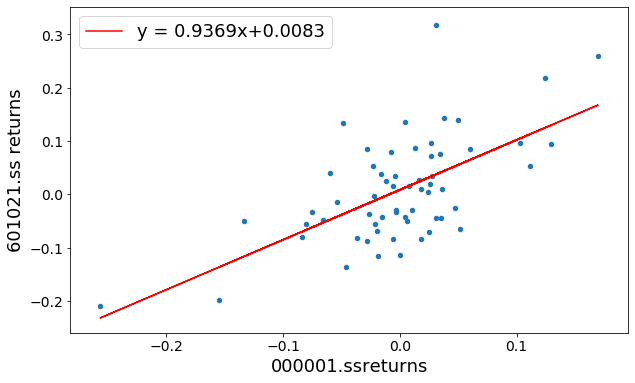

In [9]:
return_data.plot(x=index_code, y=stock_code, kind='scatter', figsize=(10, 6));
plt.plot(X, float(results.params[1])*X +float(results.params[0]), color = 'r', 
         label = 'y = {}x+{}'.format(results.params[1].round(4),results.params[0].round(4)))
plt.xlabel(index_code+'returns', size = 18)
plt.ylabel(stock_code+' returns', size = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 18)